In [504]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors as clr


from scipy.signal import lfilter


In [505]:
IMG_PATH = 'img'

<h3>1. Carregue a imagem 'vegetables.png' e segmente o background, obtendo uma imagem semelhante à 'vegetables_result.png'.</h3>

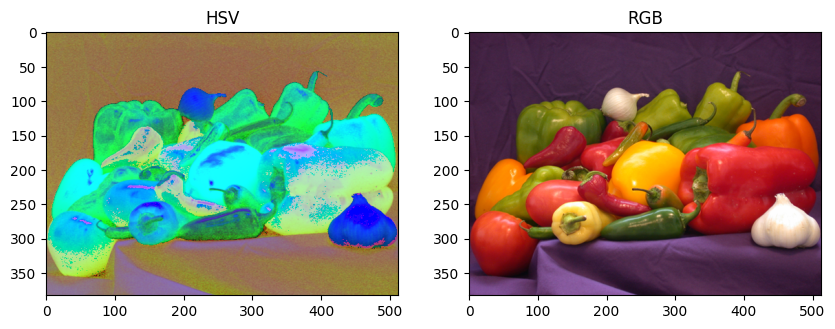

In [506]:
img = cv2.imread((f'{IMG_PATH}/vegetables.png'))
target = cv2.imread((f'{IMG_PATH}/vegetables_result.png'))
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

img_hsv = cv2.imread((f'{IMG_PATH}/vegetables.png'))
img_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_BGR2HSV)

img_rgb = cv2.imread((f'{IMG_PATH}/vegetables.png'))
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

#Plotting side by side

fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(img_hsv)
ax[0].set_title('HSV')
ax[1].imshow(img_rgb)
ax[1].set_title('RGB')

plt.show()

In [507]:
def normalize_and_plot(img_rgb):
    colors_list = img_rgb.reshape((np.shape(img_rgb)[0]*np.shape(img_rgb)[1], 3))
    colors_list.shape

    normalization = clr.Normalize(vmin=-1, vmax=1)
    normalization.autoscale(colors_list)
    colors = normalization(colors_list).tolist()

    h,s,v = cv2.split(img_hsv)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=colors, marker='.')
    ax.set_xlabel('Hue')
    ax.set_ylabel('Saturation')
    ax.set_zlabel('Value')  
    plt.show()


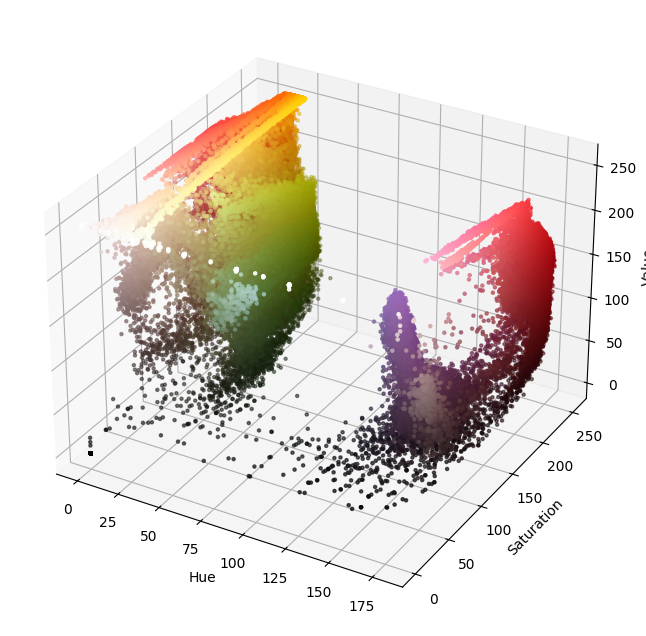

In [508]:
colors_list = img_rgb.reshape((np.shape(img_rgb)[0]*np.shape(img_rgb)[1], 3))
colors_list.shape

normalization = clr.Normalize(vmin=-1, vmax=1)
normalization.autoscale(colors_list)
colors = normalization(colors_list).tolist()

h,s,v = cv2.split(img_hsv)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=colors, marker='.')
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')  
plt.show()


In [509]:
# Purple range
lower_purple = np.array([80, 0, 0])
upper_purple = np.array([164, 200, 200])

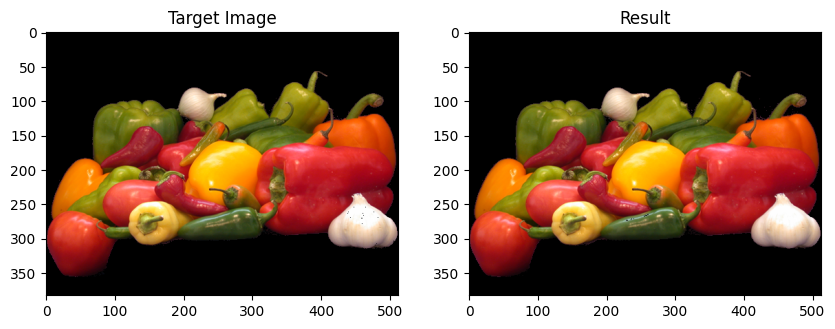

In [510]:
mask = cv2.inRange(img_hsv, lowerb=lower_purple, upperb=upper_purple)
mask = cv2.bitwise_not(mask)
 
result = cv2.bitwise_and(img, img, mask=mask)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(target)
ax1.set_title('Target Image')
ax2.imshow(result)
ax2.set_title('Result')
plt.show()

<h3>2. Carregue a imagem "andromeda.png" e retire os maiores elementos, obtendo um resultado como o ilustrado em "andromeda_result.png".</h3>

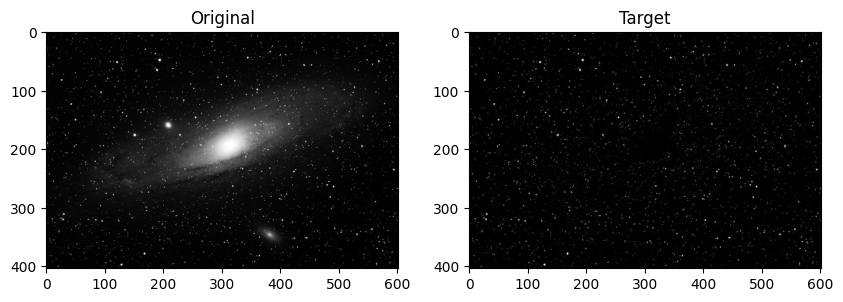

In [569]:
img = cv2.imread(f'{IMG_PATH}/andromeda.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

target = cv2.imread(f'{IMG_PATH}/andromeda_result.png')
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(target)    
ax[1].set_title('Target')
plt.show()

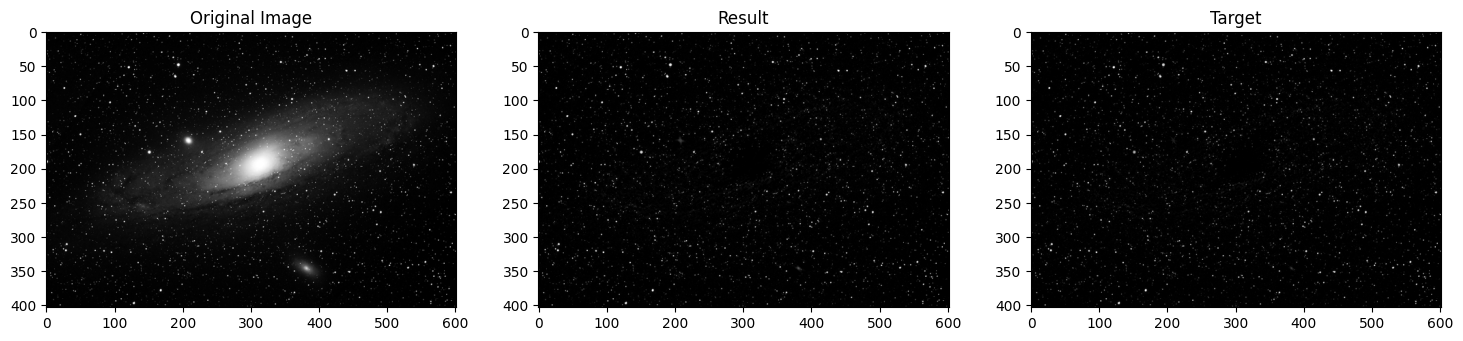

In [570]:
img =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ksize = 5
kernel = np.ones((ksize, ksize), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
result = cv2.subtract(img, opening)

fig, ax = plt.subplots(1, 3, figsize=(18, 10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(result, cmap='gray')
ax[1].set_title('Result')
ax[2].imshow(target, cmap='gray')
ax[2].set_title('Target')

plt.show()

<h3>3. Carregue a imagem "retinal.png" e use morfologia para realçar as veias, assim como exemplificado em "retinal_result.png".</h3>

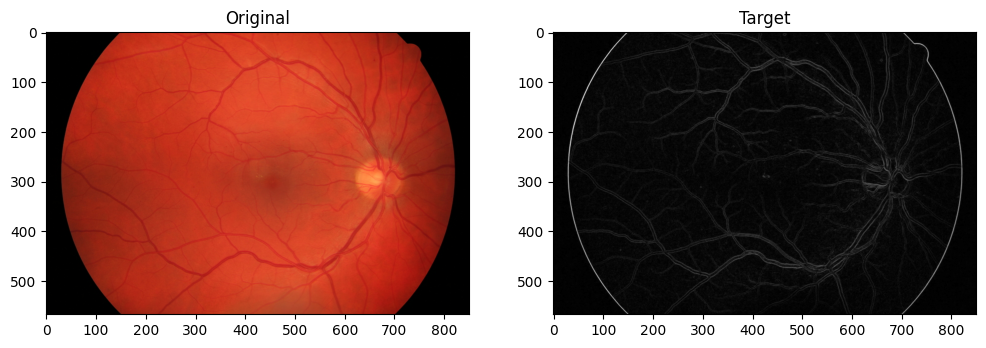

In [512]:
img = cv2.imread(f'{IMG_PATH}/retinal.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

target = cv2.imread(f'{IMG_PATH}/retinal_result.png')
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)


fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(target)
ax[1].set_title('Target')
plt.show()

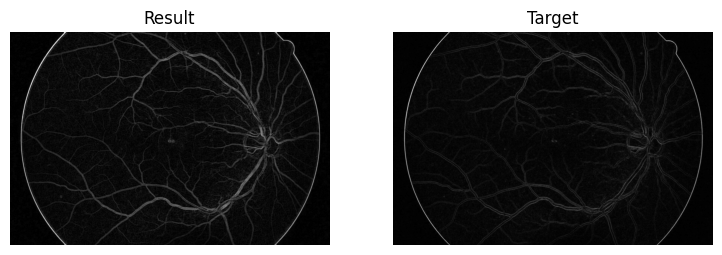

In [513]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dilate = np.ones((5, 5), np.uint8)
erode = np.ones((3, 3), np.uint8)

dilated_img = cv2.dilate(img, dilate, iterations=2)
eroded_img = cv2.erode(dilated_img, erode, iterations=2)

result = cv2.absdiff(img, eroded_img)
 
# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(1, 3, 2)
plt.imshow(result, cmap='gray')
plt.title('Result')
plt.axis('off')
 
plt.subplot(1, 3, 3)
plt.imshow(target, cmap='gray')
plt.title('Target')
plt.axis('off')

plt.show()


<h3>4. Segmentar o texto da imagem "text.tif" de forma adequada, resultando numa imagem similar à "text_result.png".</h3>

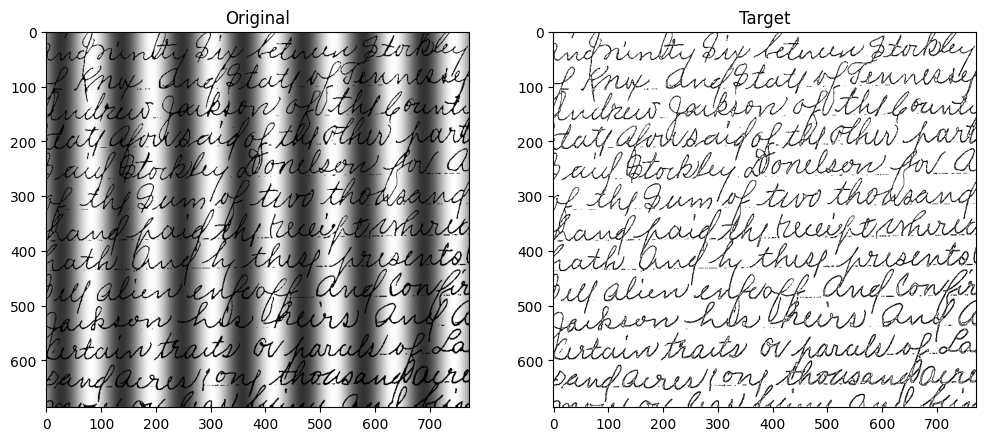

In [514]:
img = cv2.imread(f'{IMG_PATH}/text.tif')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

target = cv2.imread(f'{IMG_PATH}/text_result.png')
# target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(target)
ax[1].set_title('Target')
plt.show()

In [515]:
def smooth_image(image, n):
    maf = np.ones(n)/n
    return lfilter(maf, 1, image)

def threshold_image(image, threshold):
     return np.array(image > threshold).astype(int) 


def moving_average_threshold(image, n, k):
    smoothed = smooth_image(image, n)
    threshold = k * smoothed
    
    binary = threshold_image(smoothed, threshold)
    
    # Scale to 0-255 range
    binary = binary * 255

    return binary

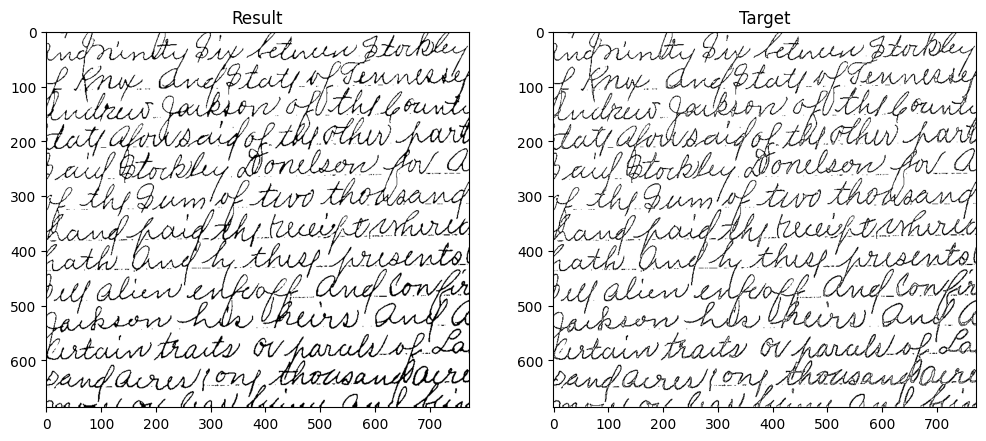

In [516]:
res = moving_average_threshold(img, 10, 0.5)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(res)
ax[0].set_title('Result')
ax[1].imshow(target)
ax[1].set_title('Target')
plt.show()
 

<h3>5. Segmentar os discos da imagem "diskslight.png" resultando numa imagem similar à "diskslight_result.png".</h3>

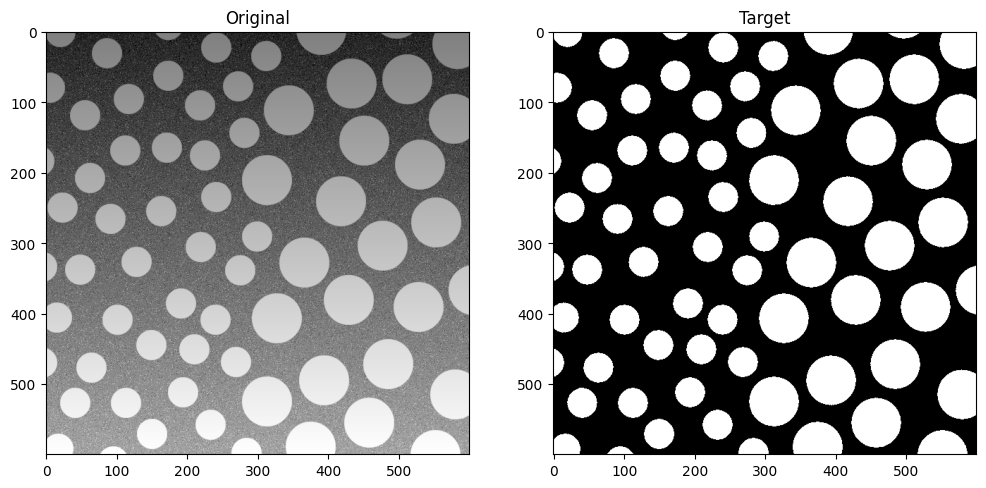

In [517]:
img = cv2.imread(f'{IMG_PATH}/diskslight.png')

target = cv2.imread(f'{IMG_PATH}/diskslight_result.png')
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)


fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(target)
ax[1].set_title('Target')
plt.show()

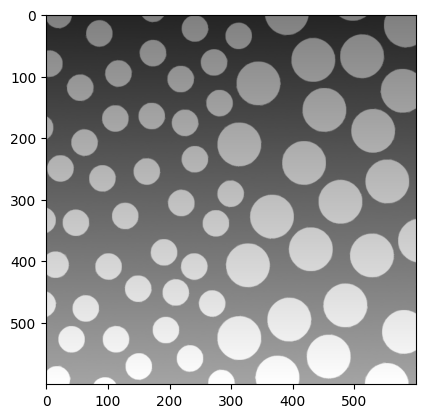

In [518]:
def remove_salt_and_pepper_noise(image, kernel_size=5):
  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    denoised_image = cv2.medianBlur(image, kernel_size)
    return denoised_image


image = img
denoised_image = remove_salt_and_pepper_noise(image)
rgb_res = cv2.cvtColor(denoised_image, cv2.COLOR_GRAY2RGB)
plt.imshow(rgb_res)


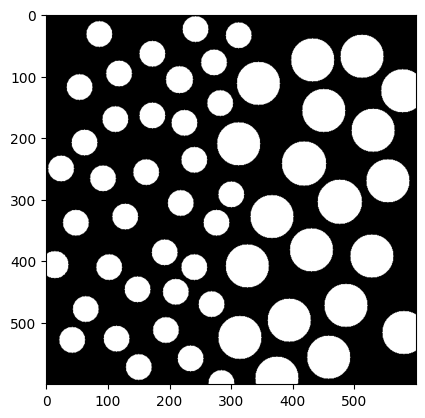

In [519]:
gray_image = remove_salt_and_pepper_noise(img)


circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, dp=1, minDist=10,
                           param1=50, param2=30, minRadius=5, maxRadius=50)

 
circles = np.round(circles[0, :]).astype("int")

new_image = np.zeros_like(img)

for (x, y, r) in circles:
    cv2.circle(new_image, (x, y), r, (255, 255, 255), -1) 


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

<h3>6. Segmente também os discos maiores e os discos menores, como ilustrado nas imagens "disklights_result2.png" e "disklights_result3.png".</h3>

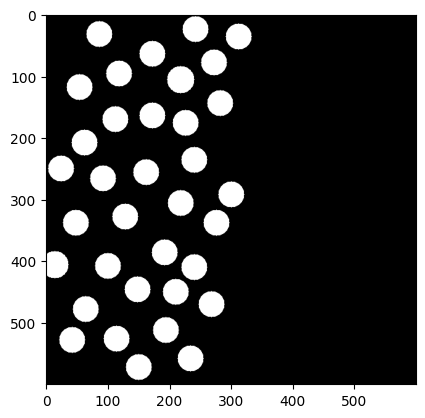

In [520]:
circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, dp=1, minDist=10,
                           param1=50, param2=30, minRadius=5, maxRadius=25)

 
circles = np.round(circles[0, :]).astype("int")

new_image = np.zeros_like(img)

for (x, y, r) in circles:
    cv2.circle(new_image, (x, y), r, (255, 255, 255), -1) 


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

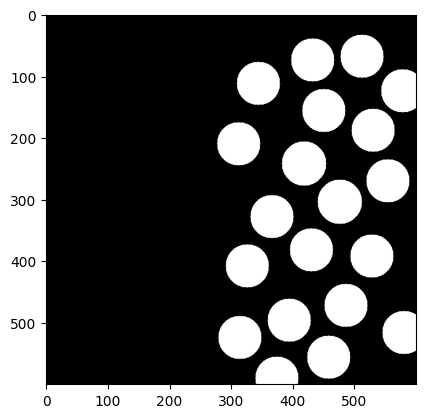

In [521]:
circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, dp=1, minDist=10,
                           param1=50, param2=30, minRadius=25, maxRadius=60)

 
circles = np.round(circles[0, :]).astype("int")

new_image = np.zeros_like(img)

for (x, y, r) in circles:
    cv2.circle(new_image, (x, y), r, (255, 255, 255), -1) 


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

<h3>7. Determinar os coeficientes de todas as retas presentes na imagem "rubik.png".</h3>

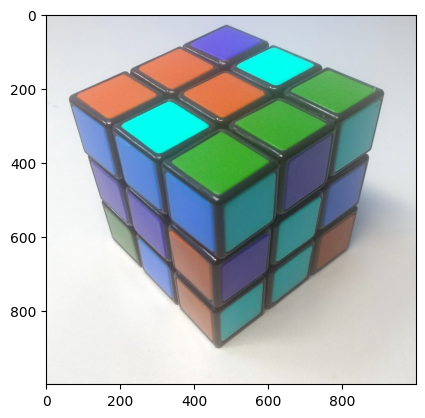

In [522]:
img = cv2.imread(f'{IMG_PATH}/rubik.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
plt.imshow(img)


38 lines found


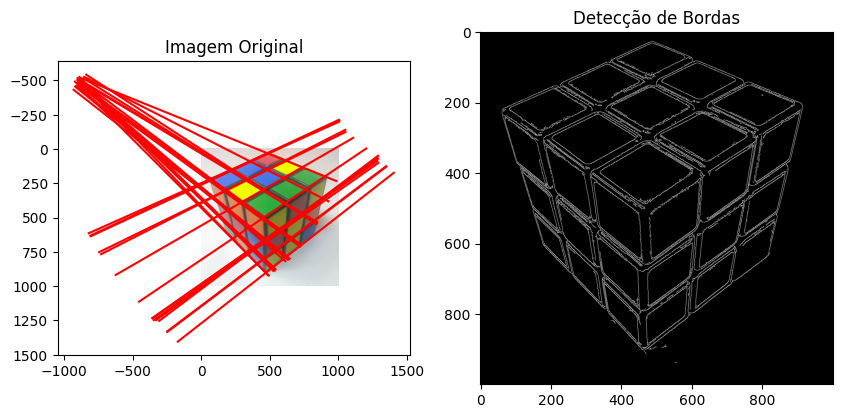

In [523]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 20, 70, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Imagem Original')

if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        plt.plot([x1, x2], [y1, y2], 'r-')

print(f'{len(lines)} lines found')
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Detecção de Bordas')
plt.show()

<h3>8. Aplique uma transformação de intensidade à imagem "lady.png" para aprimorar seu contraste.</h3>

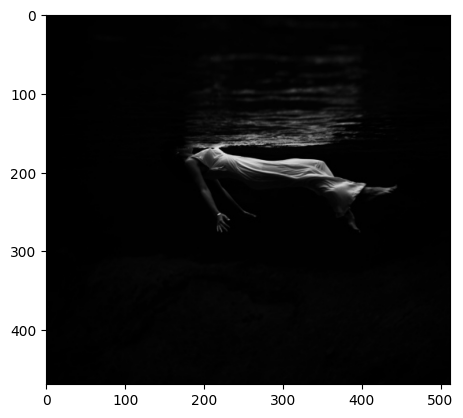

In [524]:
img = cv2.imread(f'{IMG_PATH}/lady.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)

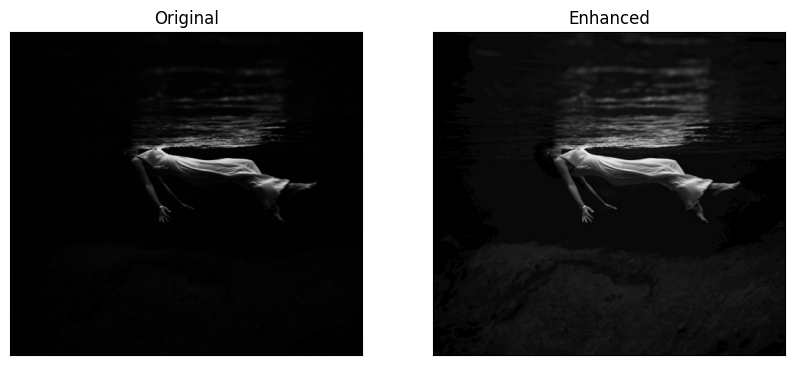

In [525]:
#Chapter 3 Gozalez

def improve_img(src, gamma=1.5):
    gamma = max(gamma, 0.1)
    
    invGamma = 0.9/ gamma
    
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(src, table)

res = improve_img(img)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res, cmap='gray')
plt.title('Enhanced'), plt.xticks([]), plt.yticks([])
plt.show()

<h3>9. A imagem "coded_message.png" contém uma mensagem cifrada numa das suas camadas binárias. Escreva o algoritmo que decifra esse código.</h3>

In [526]:
img = cv2.imread(f'{IMG_PATH}/coded_message.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bit_plane_slice(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    bit_planes = []

    for bit in range(8):
        bit_plane = np.bitwise_and(gray_image, 2**bit)
        bit_plane = bit_plane / 255
        bit_planes.append(bit_plane)

    plt.imshow(bit_planes[0], cmap='gray')
    plt.show()


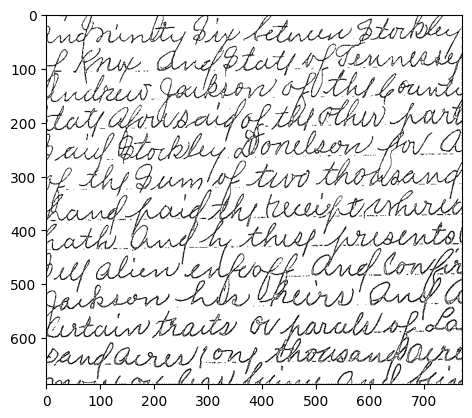

In [527]:
bit_plane_slice(img)

<h3>10. Filtre a imagem "lena_noise.png" para atenuar todos os ruídos periódicos presentes na imagem. Salve o resultado.</h3>

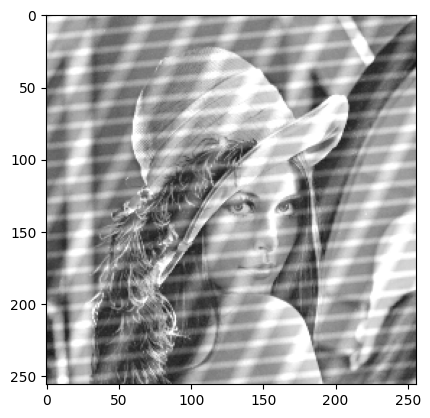

In [528]:
img = cv2.imread(f'{IMG_PATH}/lena_noise.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(rgb_img)

In [529]:
 
def fft_image(img):
    ft = np.fft.fft2(img)
    ft_shift = np.fft.fftshift(ft)
    magnitude_spectrum = np.log(np.abs(ft_shift))
    magnitude_spectrum_unshifted = np.log(np.abs(ft))   
    # Plotting the Spectrum
    plt.figure(figsize=(16,16))
 
    mask = np.ones_like(magnitude_spectrum)
    mask = mask.astype(float)

    # mask[0:50, :] = 0.75

    magnitude_spectrum = magnitude_spectrum 


    # Inversa da transformada de Fourier
    f_ishift = np.fft.ifftshift(magnitude_spectrum)
    img_back = np.fft.ifft2(np.exp(f_ishift)) # Using np.exp to invert the logarithm
    img_back = np.abs(img_back)

    # Converter de volta para uint8
    restored_image = cv2.convertScaleAbs(img_back)

 
    plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.axis('on')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122),plt.imshow(restored_image, cmap = 'gray')
    plt.axis('on')
    plt.title('Restored Image'), plt.xticks([]), plt.yticks([])

    plt.show()

 

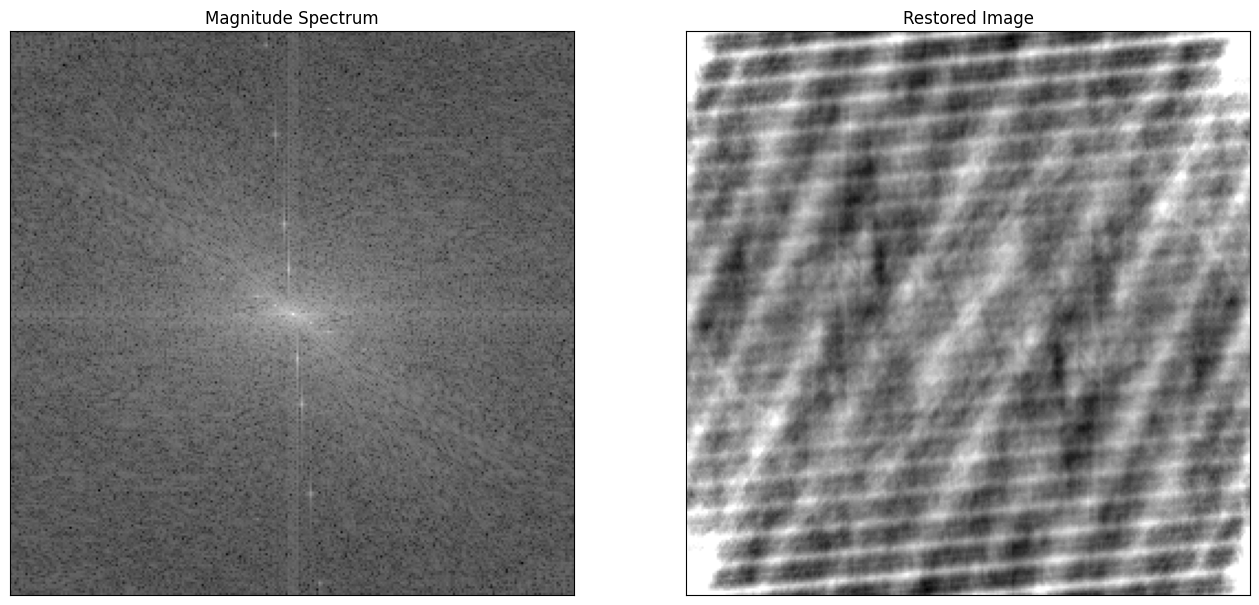

In [530]:
fft_image(gray)